## Objective


In this checkpoint, we are going to predict if a patient has chronic kidney disease or not using several classification algorithms of supervised learning. Then we will identify the inherent clusters within our data using clustering algorithms of unsupervised learning.

In [7]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [8]:
kidney_data = pd.read_csv('kidney_disease.csv')

### EDA - Exploratory Data Analysis

In [9]:
kidney_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
kidney_data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria',
                     'bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count',
                            'rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)

In [11]:
kidney_data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [12]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7   pus cell                 335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [13]:
kidney_data.describe()

,id,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [14]:
kidney_data.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          70
white blood cell count     105
red blood cell count       130
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [15]:
kidney_data.drop(['id'], axis= 1, inplace=True)

In [16]:
kidney_data['red blood cells'].value_counts()

normal      201
abnormal     47
Name: red blood cells, dtype: int64

In [17]:
kidney_data['red blood cells'].fillna('normal', inplace=True)

In [18]:
kidney_data['pus cell'].value_counts()

normal      259
abnormal     76
Name: pus cell, dtype: int64

In [19]:
kidney_data['pus cell'].fillna('normal', inplace=True)

In [20]:
kidney_data['pus cell clumps'].value_counts()

notpresent    354
present        42
Name: pus cell clumps, dtype: int64

In [21]:
kidney_data['pus cell clumps'].fillna('notpresent', inplace= True)

In [22]:
kidney_data['bacteria'].value_counts()

notpresent    374
present        22
Name: bacteria, dtype: int64

In [23]:
kidney_data['bacteria'].fillna('notpresent', inplace=True)

In [24]:
kidney_data['white blood cell count'].value_counts()

9800     11
6700     10
9200      9
9600      9
7200      9
         ..
19100     1
\t?       1
12300     1
14900     1
12700     1
Name: white blood cell count, Length: 92, dtype: int64

In [26]:
kidney_data['hypertension'].value_counts()

no     251
yes    147
Name: hypertension, dtype: int64

In [27]:
kidney_data['hypertension'].fillna('no', inplace=True)

In [28]:
kidney_data.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [29]:
kidney_data['diabetes mellitus'] = kidney_data['diabetes mellitus'].replace({
    '\tyes' : 'yes'
})


In [30]:
kidney_data['diabetes mellitus'].value_counts()

no      258
yes     136
\tno      3
 yes      1
Name: diabetes mellitus, dtype: int64

In [31]:
kidney_data['diabetes mellitus'].fillna('no', inplace=True)

In [32]:
kidney_data['coronary artery disease'].value_counts()

no      362
yes      34
\tno      2
Name: coronary artery disease, dtype: int64

In [33]:
kidney_data['coronary artery disease'] = kidney_data['coronary artery disease'].replace({
    '\tno' : 'no'
})

In [34]:
kidney_data['coronary artery disease'].fillna('no', inplace=True)

In [35]:
kidney_data['appetite'].value_counts()

good    317
poor     82
Name: appetite, dtype: int64

In [36]:
kidney_data['appetite'].fillna('good', inplace=True)

In [37]:
kidney_data['pedal edema'].value_counts()

no     323
yes     76
Name: pedal edema, dtype: int64

In [38]:
kidney_data['pedal edema'].fillna('no', inplace=True)

In [39]:
kidney_data['anemia'].value_counts()

no     339
yes     60
Name: anemia, dtype: int64

In [40]:
kidney_data['anemia'].fillna('no', inplace=True)

In [41]:
kidney_data['class'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: class, dtype: int64

In [42]:
kidney_data['class'] = kidney_data['class'].replace({
    'ckd\t' : 'ckd'
})

In [43]:
kidney_data['class'].fillna('ckd', inplace=True)

In [44]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red blood cells          400 non-null    object 
 6   pus cell                 400 non-null    object 
 7   pus cell clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood urea               381 non-null    float64
 11  serum creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [45]:
# converting  packed cell volume, white blood cell count, red blood cell count and age columns to their appropriate data df['packed cell volume'] = pd.to_numeric(df['packed cell volume'], errors='coerce')

kidney_data['packed cell volume'] = pd.to_numeric(kidney_data['packed cell volume'], errors='coerce')
kidney_data['white blood cell count'] = pd.to_numeric(kidney_data['white blood cell count'], errors='coerce')
kidney_data['red blood cell count'] = pd.to_numeric(kidney_data['red blood cell count'], errors='coerce')



In [46]:
#Filling the categorical column with the most frequent class
#data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [47]:
#Filling null values  with the mean  for the numerical column
kidney_data = kidney_data.fillna(kidney_data.mean())

In [48]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red blood cells          400 non-null    object 
 6   pus cell                 400 non-null    object 
 7   pus cell clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood glucose random     400 non-null    float64
 10  blood urea               400 non-null    float64
 11  serum creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  hemoglobin               4

In [49]:
#Seperating the numerical variable and categerical variable to properly explore the distribution of the variables

numerical_features = kidney_data.select_dtypes(exclude='object')
categorical_features = kidney_data.select_dtypes(include='object')

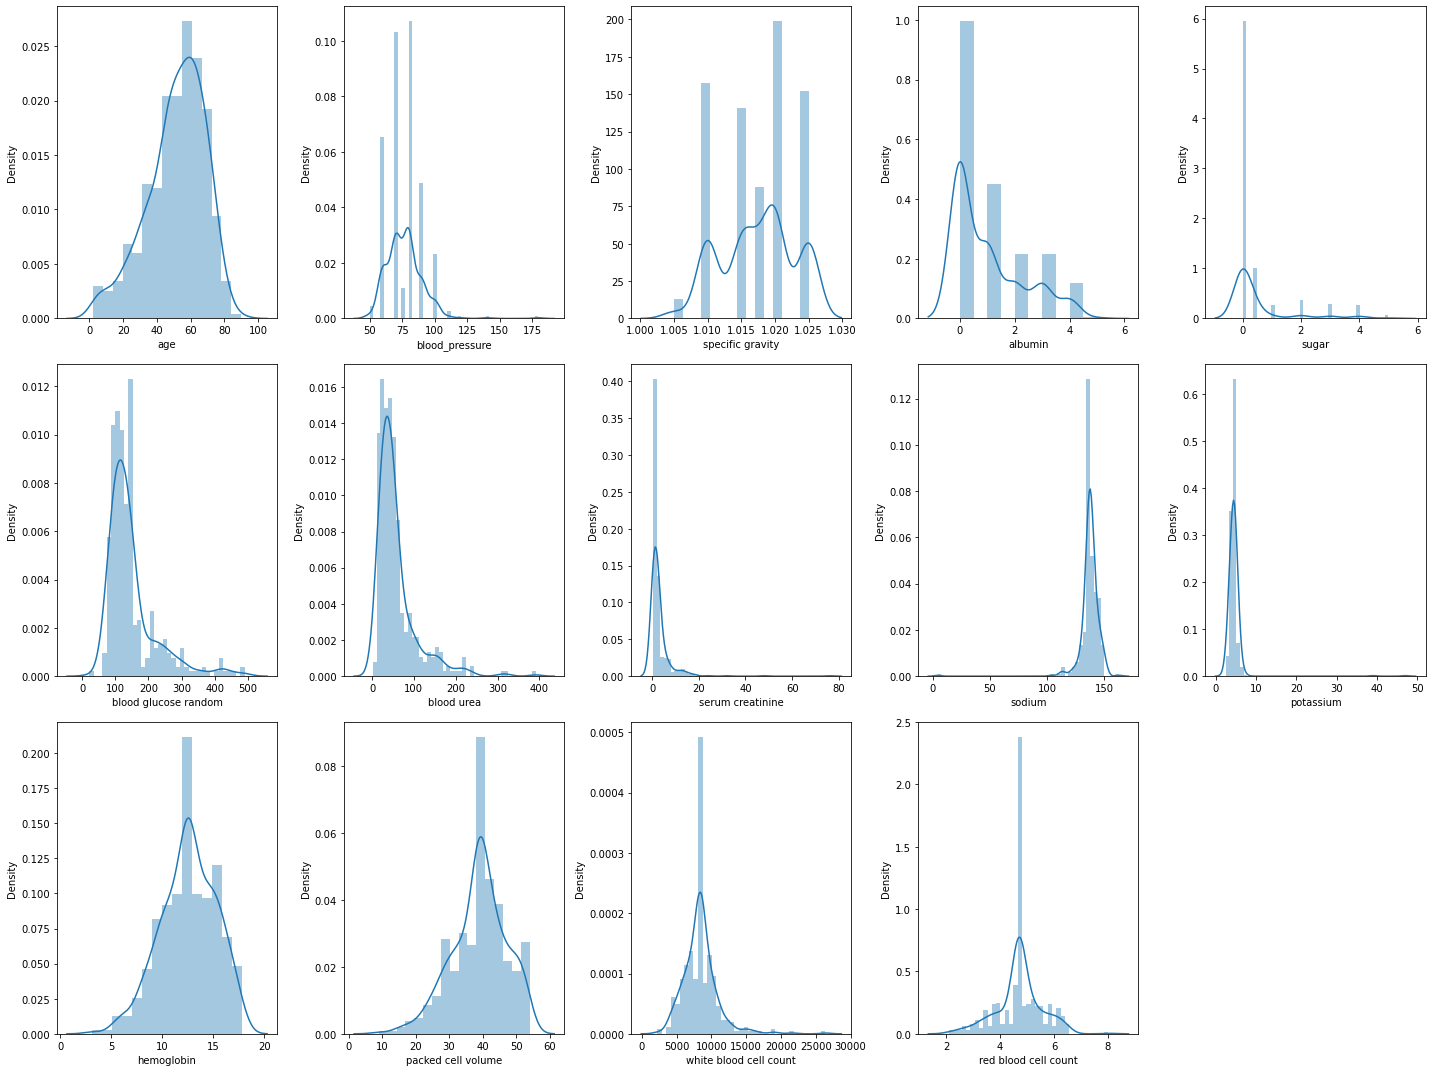

In [50]:
#view the distribution of the variables/ columns
import seaborn as sns
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numerical_features:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(kidney_data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

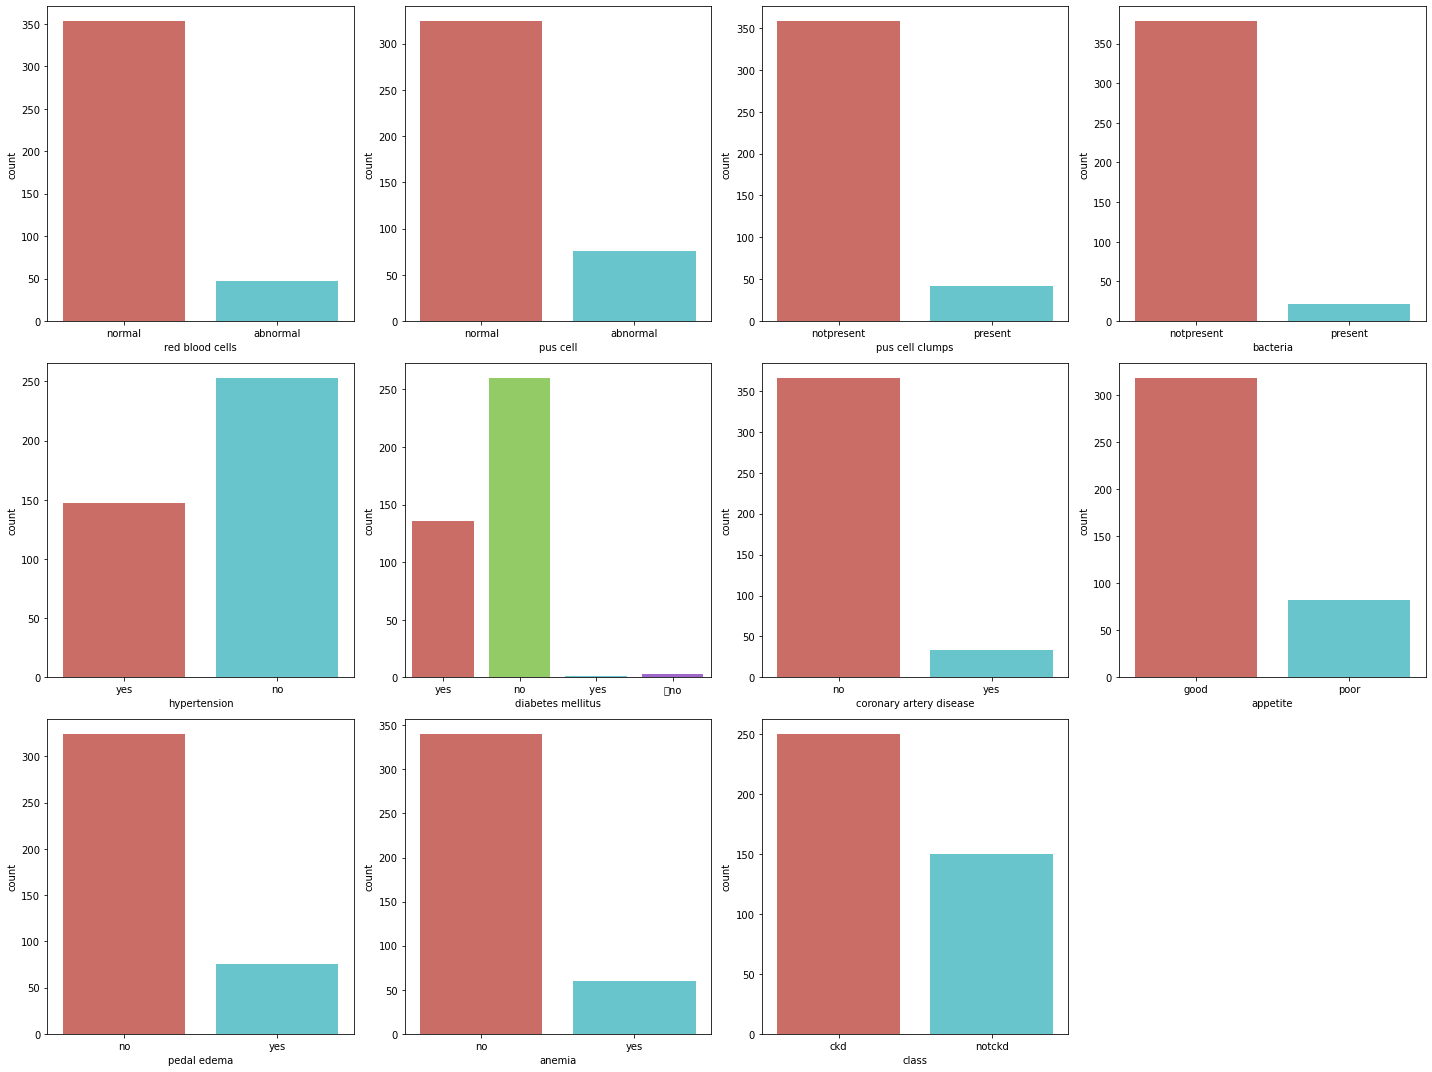

In [51]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in categorical_features:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(kidney_data[column], palette = 'hls')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [52]:
#Data Transformation

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_features:
    kidney_data[col] = le.fit_transform(kidney_data[col])
    
    
kidney_data.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,3,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,2,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,3,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,2,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,2,0,0,0,0,0


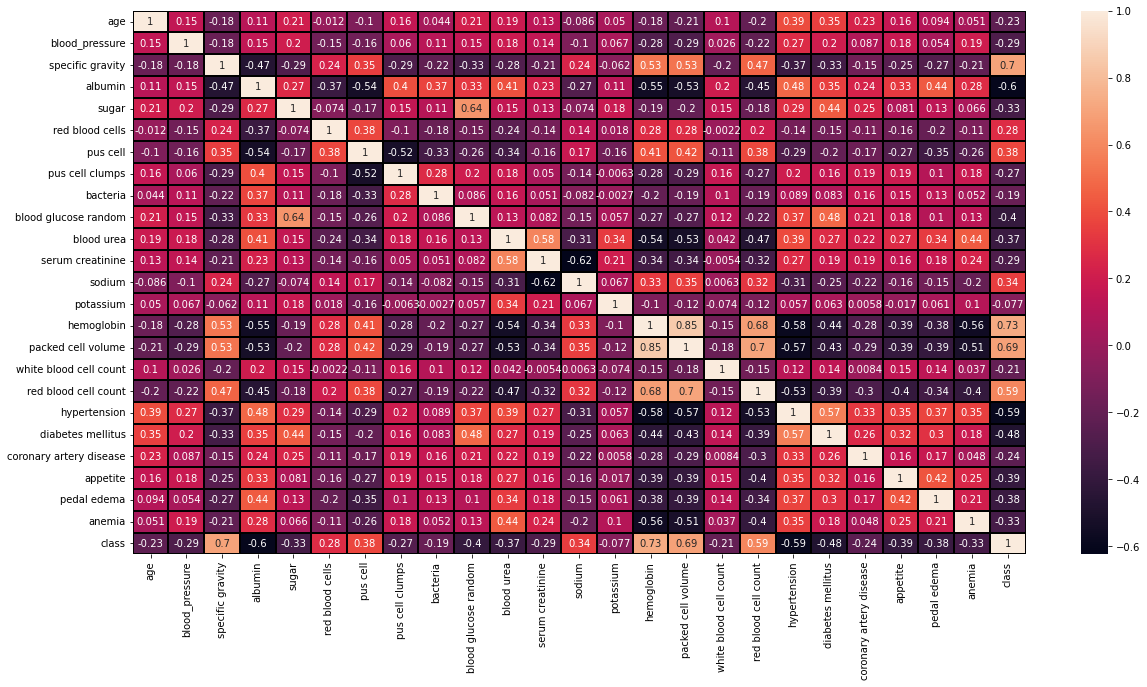

In [53]:
#Checking for correlation between the features and label

plt.figure(figsize = (20, 10))

sns.heatmap(kidney_data.corr(), annot = True, linewidths = 2, linecolor = 'black')
plt.show()

In [54]:
#feature seleection
x = kidney_data[['specific gravity','albumin', 'hemoglobin', 'packed cell volume', 'red blood cell count', 'hypertension','diabetes mellitus']]
y = kidney_data['class'].values

# Logistic Regression

In [55]:
# import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size = 0.3, random_state= 30)

model.fit(x_train, y_train)

LogisticRegression()

In [56]:
y_pred = model.predict(x_test)

y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0])

In [57]:
print(f'Testing Accuracy = {model.score(x_test, y_test)}')

Testing Accuracy = 0.9833333333333333


In [58]:
print(f'Train Accuracy = {model.score(x_train, y_train)}')

Train Accuracy = 0.9642857142857143


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

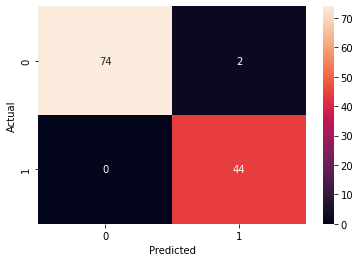

In [59]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
#confusion matrix


confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        76
           1       0.96      1.00      0.98        44

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



### Logistic Regression Summary

Based on the classifcation report

97% of patient chronic kidney disease predictied by the model was correct
98% of patient without chronic kidney disease predicted by the model was correct

In [61]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, y_pred, pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
fpr, tpr, _= roc_curve(y_test, random_probs, pos_label=1)
print(fpr, tpr, _)

[0. 1.] [0. 1.] [1 0]


In [62]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_test, y_pred)

print(auc_score)

0.986842105263158


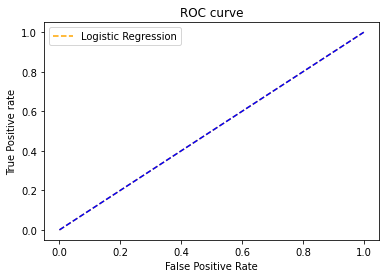

In [63]:
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr, tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

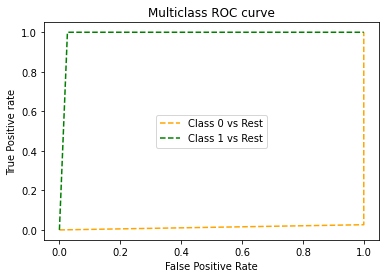

In [64]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred, pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

# K-Nearest Neighbor

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [66]:
knn = KNeighborsClassifier(5)

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [67]:
knn_y_pred = knn.predict(x_test)

In [68]:
print(f'The accuracy of the training model is {accuracy_score(knn_y_pred, y_test)}')

The accuracy of the training model is 0.9666666666666667


In [69]:
print(f'The accuracy of the model on train data is {accuracy_score(knn.predict(x_train), y_train)}')

The accuracy of the model on train data is 0.9535714285714286


In [70]:
#to find the optimal k 
scores = []
for k in range(1,20):
  knn = KNeighborsClassifier(k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  print(f'{k} : {accuracy_score(knn_y_pred, y_test)}')
  scores.append(accuracy_score(knn_y_pred, y_test))

1 : 0.9666666666666667
2 : 0.9666666666666667
3 : 0.9666666666666667
4 : 0.9666666666666667
5 : 0.9666666666666667
6 : 0.9666666666666667
7 : 0.9666666666666667
8 : 0.9666666666666667
9 : 0.9666666666666667
10 : 0.9666666666666667
11 : 0.9666666666666667
12 : 0.9666666666666667
13 : 0.9666666666666667
14 : 0.9666666666666667
15 : 0.9666666666666667
16 : 0.9666666666666667
17 : 0.9666666666666667
18 : 0.9666666666666667
19 : 0.9666666666666667


Text(0.5, 1.0, 'Testing Accuracy for the Value of K')

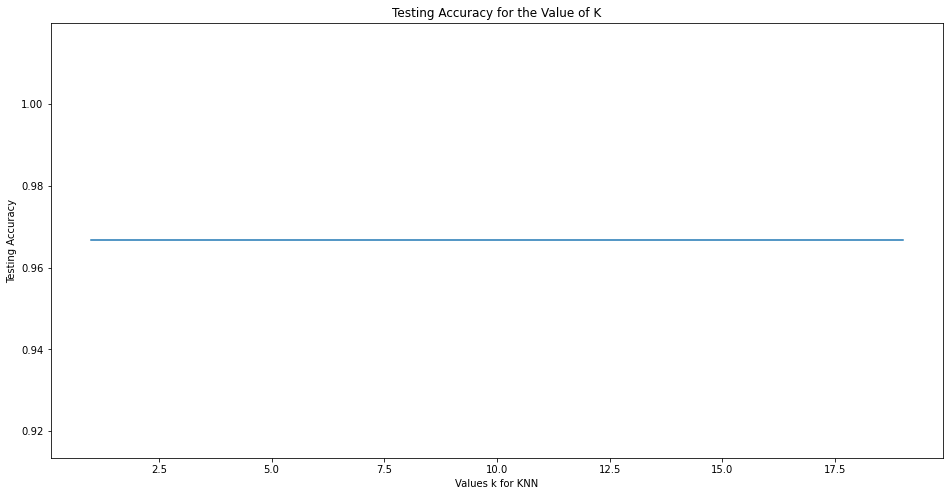

In [71]:
# Optimal K Value Plot
import matplotlib.pyplot as plt

plt.figure(figsize= (16, 8))
plt.plot(range(1,20), scores)
plt.xlabel('Values k for KNN')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy for the Value of K')

# Decision Tree

In [72]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()

In [73]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [74]:
y_pred =dt.predict(x_test)

In [75]:
print(f'Accuracy of test data = {accuracy_score(y_pred, y_test)}')

Accuracy of test data = 0.9666666666666667


In [76]:
print(f'Accuracy of training data = {accuracy_score(dt.predict(x_train), y_train)}')

Accuracy of training data = 0.9928571428571429


In [77]:
!pip install graphviz

In [92]:
!pip install dtreeviz

In [93]:
dtree = tree.DecisionTreeClassifier(criterion= 'gini', splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth = 5)

[Text(0.5454545454545454, 0.9375, 'hemoglobin <= 13.25\ngini = 0.471\nsamples = 280\nvalue = [174, 106]\nclass = Yes'),
 Text(0.36363636363636365, 0.8125, 'packed cell volume <= 44.5\ngini = 0.091\nsamples = 168\nvalue = [160, 8]\nclass = Yes'),
 Text(0.2727272727272727, 0.6875, 'specific gravity <= 1.019\ngini = 0.059\nsamples = 165\nvalue = [160, 5]\nclass = Yes'),
 Text(0.18181818181818182, 0.5625, 'gini = 0.0\nsamples = 136\nvalue = [136, 0]\nclass = Yes'),
 Text(0.36363636363636365, 0.5625, 'packed cell volume <= 40.0\ngini = 0.285\nsamples = 29\nvalue = [24, 5]\nclass = Yes'),
 Text(0.2727272727272727, 0.4375, 'albumin <= 0.5\ngini = 0.198\nsamples = 27\nvalue = [24, 3]\nclass = Yes'),
 Text(0.18181818181818182, 0.3125, 'hemoglobin <= 12.013\ngini = 0.42\nsamples = 10\nvalue = [7, 3]\nclass = Yes'),
 Text(0.09090909090909091, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Yes'),
 Text(0.2727272727272727, 0.1875, 'diabetes mellitus <= 2.5\ngini = 0.49\nsamples = 7\nvalu

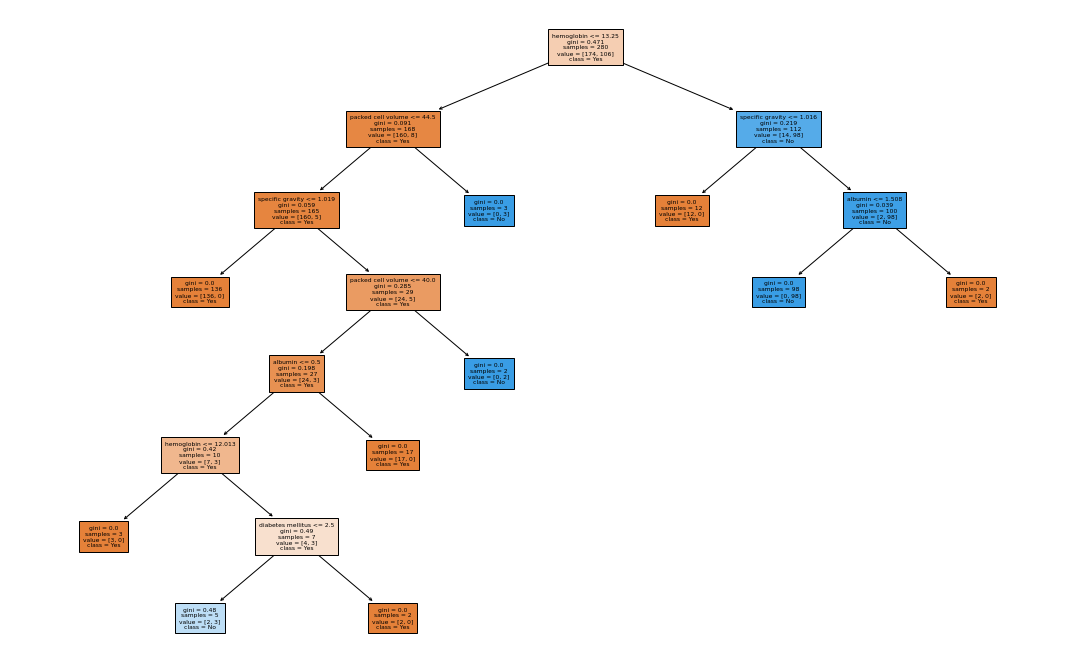

In [94]:
plt.figure(figsize=(19,12))
feature_names = list(x_train.columns)
classes = ['Yes', 'No']

tree.plot_tree(dt, feature_names=feature_names, class_names=classes,fontsize=6, filled=True)


In [96]:
# from sklearn import tree
# import graphviz
# graph_ = tree.export_graphviz(dt,label='all',rounded=True,filled=True)
# graph = graphviz.Source(graph_)

# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

# graph.render("kidney_data")
# graph

# Random Forest 

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics


x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=20)

rf = RandomForestClassifier(n_estimators=5)

rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5)

In [85]:
y_pred = rf.predict(x_test)

In [86]:
print(f'The accuracy for the test data : {metrics.accuracy_score(y_pred, y_test)}')

The accuracy for the test data : 0.9833333333333333


In [88]:
Y_pred_train = rf.predict(x_train)

print(f'The accuracy for the training data : {metrics.accuracy_score(Y_pred_train, y_train)}')

The accuracy for the training data : 0.9928571428571429


In [89]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators = 5)
scores = cross_val_score(rf, x, y, cv = 5)

print(f'Accuracy on each fold : {scores}')
print(f'Accuracy of the accuracy : {sum(scores)/5}')

Accuracy on each fold : [0.9875 0.9875 0.95   0.9875 0.975 ]
Accuracy of the accuracy : 0.9774999999999998


In [90]:
# random forest with a different estimator

scores = []
for e in range(1,10):
    rf = RandomForestClassifier(e)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    print(f'The accuracy for the test data {e} esimator: {accuracy_score(y_pred, y_test)}')
    scores.append(accuracy_score(y_pred, y_test))

The accuracy for the test data 1 esimator: 0.9666666666666667
The accuracy for the test data 2 esimator: 0.9583333333333334
The accuracy for the test data 3 esimator: 0.9833333333333333
The accuracy for the test data 4 esimator: 0.9833333333333333
The accuracy for the test data 5 esimator: 0.975
The accuracy for the test data 6 esimator: 0.9916666666666667
The accuracy for the test data 7 esimator: 0.9833333333333333
The accuracy for the test data 8 esimator: 0.975
The accuracy for the test data 9 esimator: 0.975


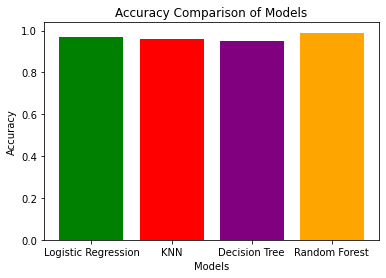

In [91]:
# Define the models and their accuracy scores
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracy_scores = [0.97, 0.96, 0.95, 0.99]

# Specify the colors for each bar
colors = ['green', 'red', 'purple', 'orange']


# Plot the bar graph
x_pos = np.arange(len(models))
plt.bar(x_pos, accuracy_scores, align='center' , color=colors)
plt.xticks(x_pos, models)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Accuracy Comparison of Models')
plt.show()

# Unsupervised learning

<Figure size 1080x576 with 0 Axes>

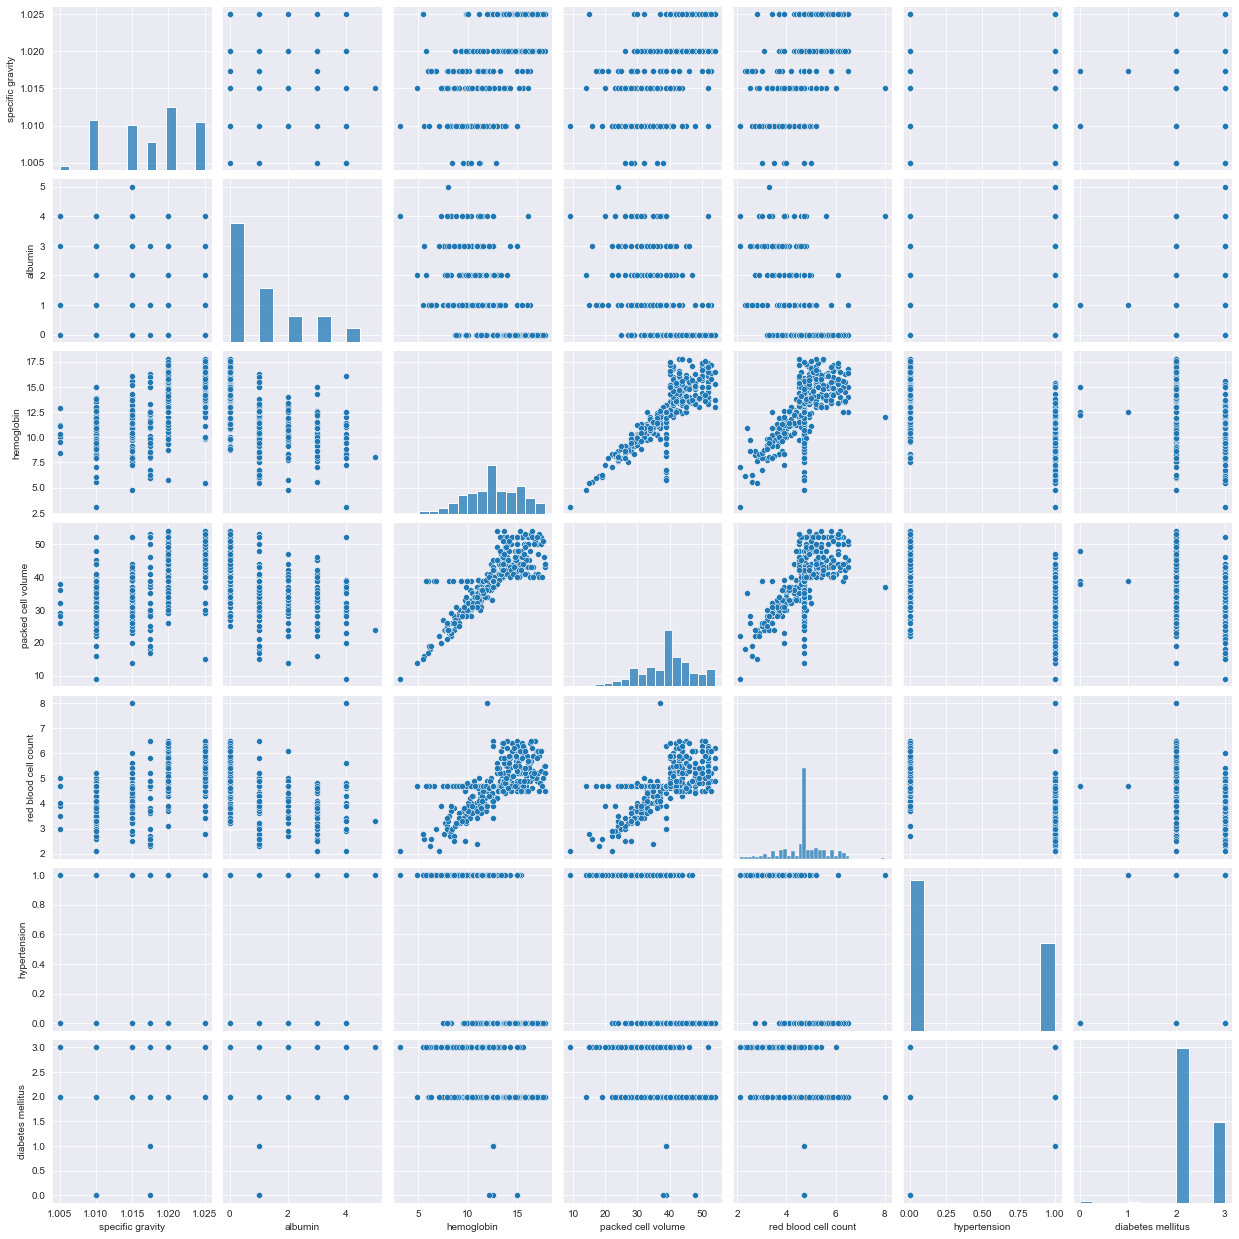

In [97]:
# Let's do a pairplot using seaborn to visualize if we can get distinct groups from the data

import seaborn as sb
sb.set_style('darkgrid')
plt.figure(figsize=(15,8))

sb.pairplot(x)

## Aglomerative Clustering

In [98]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(x)
agg_clusters

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 2,
       0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0,

In [111]:
x.shape
len(agg_clusters)
x.iloc[0][0]

1.02

In [113]:
x

,specific gravity,albumin,hemoglobin,packed cell volume,red blood cell count,hypertension,diabetes mellitus
0,1.020,1.0,15.4,44.0,5.200000,1,3
1,1.020,4.0,11.3,38.0,4.707435,0,2
2,1.010,2.0,9.6,31.0,4.707435,0,3
3,1.005,4.0,11.2,32.0,3.900000,1,2
4,1.010,2.0,11.6,35.0,4.600000,0,2
...,...,...,...,...,...,...,...
395,1.020,0.0,15.7,47.0,4.900000,0,2
396,1.025,0.0,16.5,54.0,6.200000,0,2
397,1.020,0.0,15.8,49.0,5.400000,0,2
398,1.025,0.0,14.2,51.0,5.900000,0,2


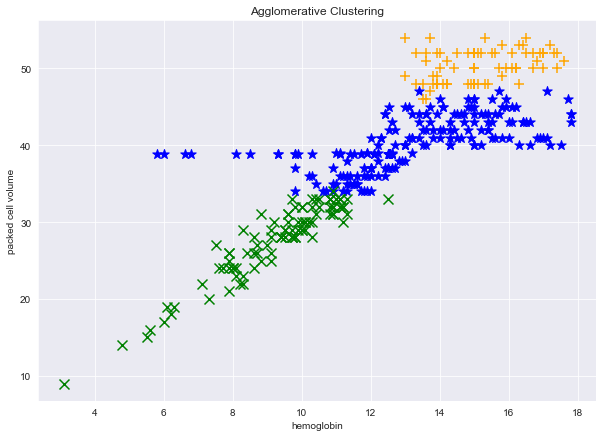

In [114]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,7))
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples.iloc[sample][2], samples.iloc[sample][3], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('hemoglobin')
    plt.ylabel('packed cell volume')
    plt.title('Agglomerative Clustering')
    plt.show()

plot_clusters(x, agg_clusters)

In [115]:
# verify how good the clustering is using silhouette score

from sklearn.metrics import silhouette_score

print(silhouette_score(x, agg_clusters))


0.48321558313892404


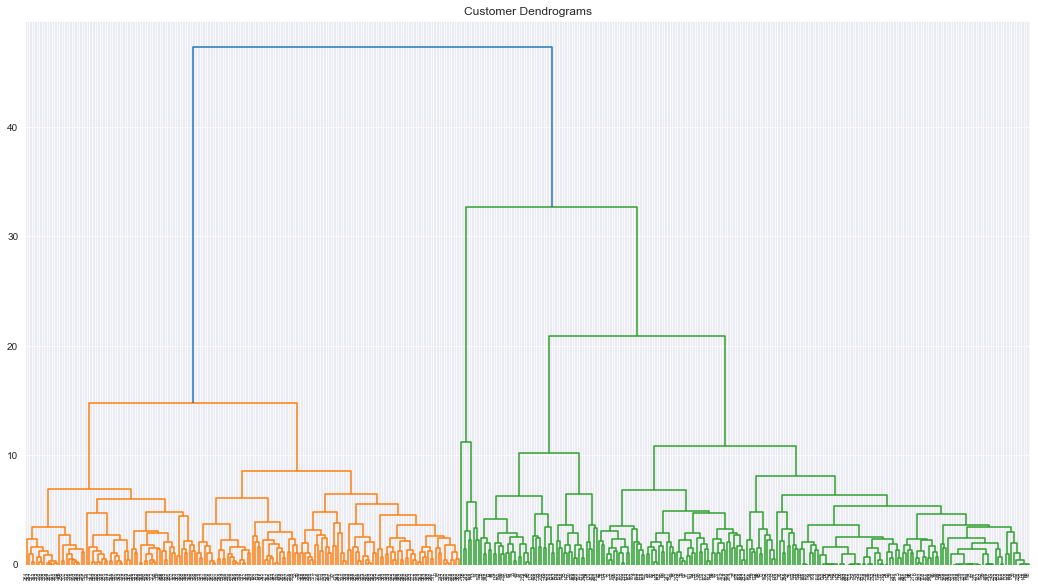

In [118]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(18,10))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(x, method="complete"))

## K-means Clustering

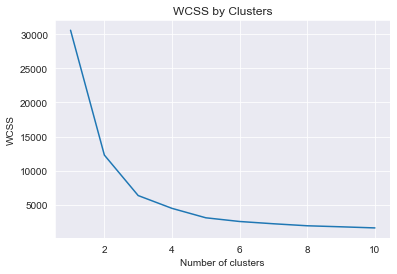

In [119]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(x)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [120]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(x)
# View the cluster assignments
km_clusters

array([0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       1, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 2,
       2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,

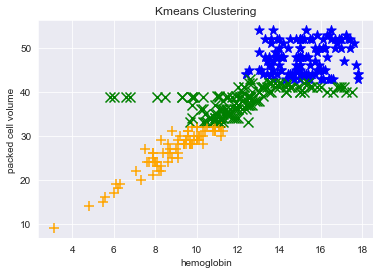

In [126]:
## Let's plot the clusters

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples.iloc[sample][2], samples.iloc[sample][3], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('hemoglobin')
    plt.ylabel('packed cell volume')
    plt.title('Kmeans Clustering')
    plt.show()

plot_clusters(x, km_clusters)